In [1]:
import gymnasium as gym
import aero_gym
from aero_gym.tools import evaluate, plotfile
import numpy as np
import math
from gymnasium.utils.env_checker import check_env
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
t_max = 20
delta_t = 0.1
t = np.linspace(0, t_max, int(t_max/delta_t)+1)

In [3]:
h_ddot_impulse = np.zeros(len(t))
h_ddot_impulse[0] = 1.0
h_ddot_ones = np.ones(len(t))
h_ddot_binary_periodic = (np.sin(t) > 0).astype(int) - 0.01*(np.sin(t) < 0).astype(int)

## Impulse

In [4]:
env = gym.make(
    'aero_gym/wagner-v0', 
    t_max=10, 
    delta_t=delta_t, 
    h_ddot_prescribed=h_ddot_impulse,
    observe_alpha_eff=True,
    reward_type=3)

In [5]:
env.observation_space

Box(-inf, inf, (3,), float32)

In [6]:
env.reset()
env.step([0.0])

(array([ 0. ,  0. , -0.1], dtype=float32),
 0.21460183660255172,
 False,
 False,
 {'t_hist': array([0.]),
  'h_dot_hist': array([0.]),
  'h_ddot_hist': array([1.]),
  'alpha_hist': array([0.]),
  'alpha_dot_hist': array([0.]),
  'alpha_ddot_hist': array([0.]),
  'fy_hist': array([-0.78539816]),
  'reference_lift_hist': array([0.]),
  't': 0.1,
  'time_step': 1})

In [7]:
check_env(env.unwrapped)

/Users/beckers/unsteady_aero_RL/.venv/lib/python3.9/site-packages/gymnasium/utils/env_checker.py:225: UserWarning: WARN: A Box observation space minimum value is -infinity. This is probably too low.
  logger.warn(
/Users/beckers/unsteady_aero_RL/.venv/lib/python3.9/site-packages/gymnasium/utils/env_checker.py:229: UserWarning: WARN: A Box observation space maximum value is -infinity. This is probably too high.
  logger.warn(


In [8]:
obs, info, render_list = evaluate(env)

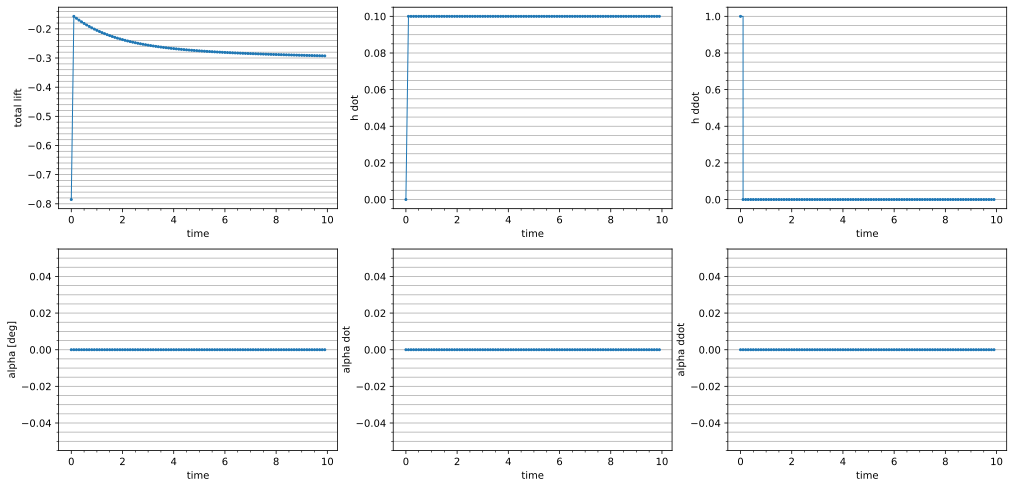

In [9]:
%config InlineBackend.figure_format = 'svg'
fig, axarr = plotfile(info)

## Step

In [10]:
env = gym.make(
    'aero_gym/wagner-v0', 
    render_mode="ansi", 
    t_max=t_max, 
    delta_t=delta_t, 
    h_ddot_prescribed=h_ddot_ones,
    reward_type=3,
    h_dot_termination=False,
    )

In [11]:
obs, info, render_list = evaluate(env)

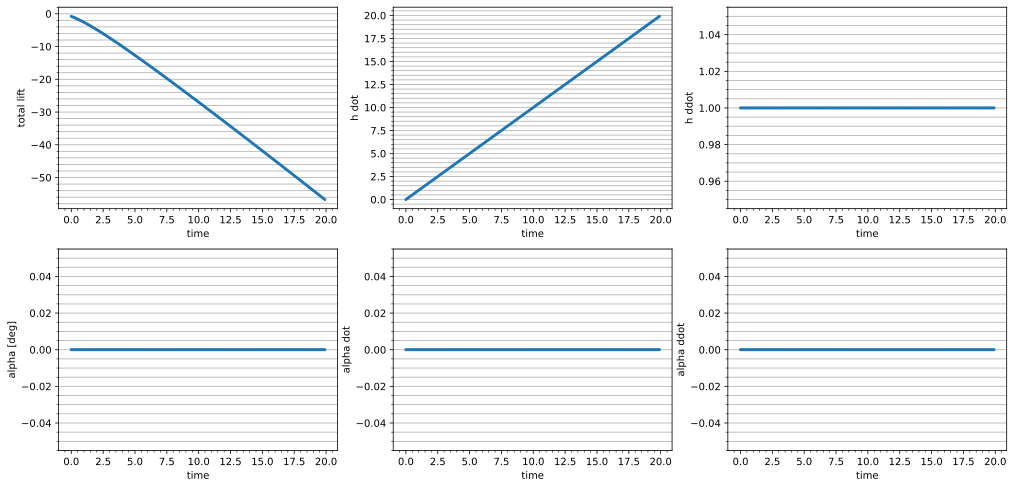

In [12]:
%config InlineBackend.figure_format = 'svg'
fig, axarr = plotfile(info)

## Gaussian

In [13]:
def gaussian(x, a, b, c):
    return a * math.exp(-(x - b) ** 2 / (2 * c ** 2))

def dgaussian(x, a, b, c):
    return a * -(x - b) / c ** 2 * math.exp(-(x - b) ** 2 / (2 * c ** 2))

def ddgaussian(x, a, b, c):
    return a * (x ** 2 + b ** 2 - 2 * b * x - c ** 2) / c ** 4 * math.exp(-(x - b) ** 2 / (2 * c ** 2))

In [14]:
a = -2/3*0.1
b = 3.0
c = 0.4
h_ddot_dgaussian = [dgaussian(ti, a, b, c) for ti in t]

a = 0.015
b = 15.0
c = 0.4
alpha_ddot_ddgaussian = [ddgaussian(ti, a, b, c) for ti in t]

In [15]:
env = gym.make(
    'aero_gym/wagner-v0', 
    render_mode="ansi", 
    t_max=t_max, 
    delta_t=delta_t, 
    h_ddot_prescribed=h_ddot_dgaussian,
    reward_type=3,
    observe_alpha_eff=True,
    alpha_dot_termination=False,
    alpha_termination=False,
    h_dot_termination=False)

In [16]:
obs, info, render_list = evaluate(env, alpha_ddot_prescribed=alpha_ddot_ddgaussian)

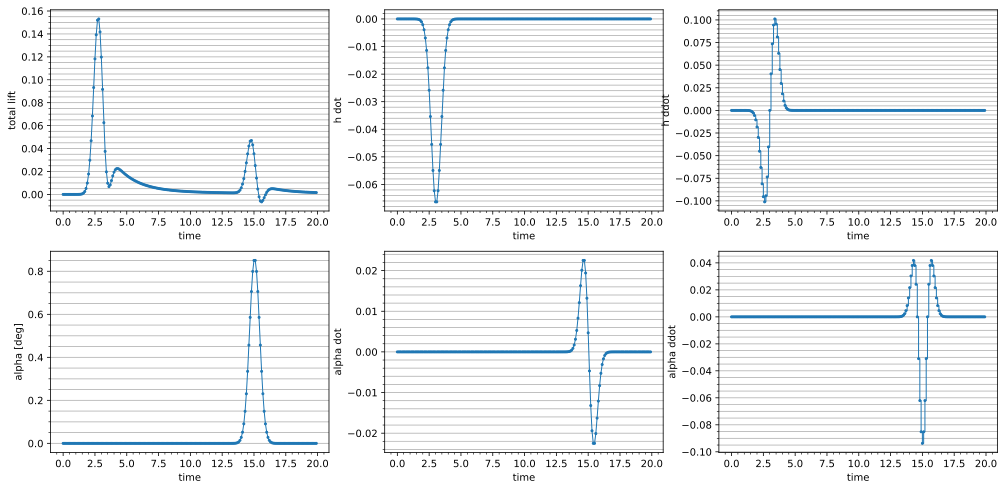

In [17]:
%config InlineBackend.figure_format = 'svg'
fig, axarr = plotfile(info)